In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
from sklearn.linear_model import LinearRegression


# **HANDLING MISSING VALUES**

In [ ]:
df=pd.read_csv("Housing.csv", usecols=['price', 'area'])
df['sqmeter'] = df['area']/10.764
df['price'] = df['price'].round(2)
df['sqmeter'] = df['sqmeter'].round(2)
df = df.drop(columns='area')
df

,price,sqmeter
0,13300000,689.33
1,12250000,832.40
2,12250000,925.31
3,12215000,696.77
4,11410000,689.33
...,...,...
540,1820000,278.71
541,1767150,222.97
542,1750000,336.31
543,1750000,270.35


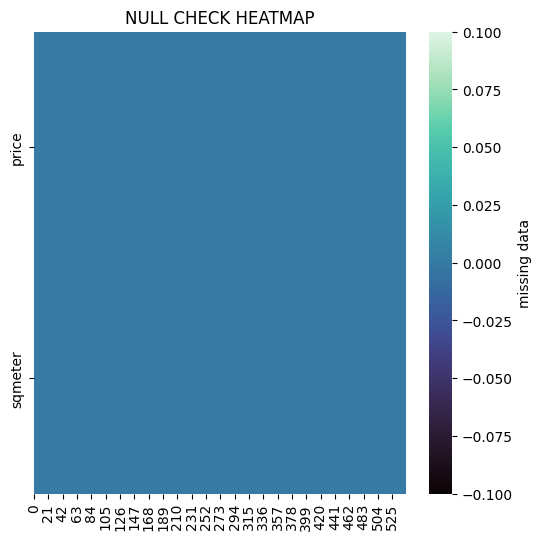

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(df.isna().transpose(), cmap = "mako", cbar_kws = {"label":"missing data"})
plt.title('NULL CHECK HEATMAP')
plt.show()

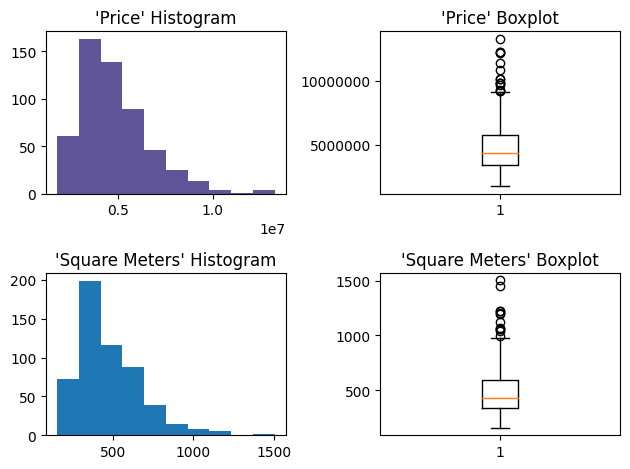

In [ ]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(df['price'], color='#1C0D6E', alpha=0.7)
axs[0, 0].set_title("'Price' Histogram")

axs[0, 1].boxplot(df['price'])
axs[0, 1].set_title("'Price' Boxplot")
axs[0, 1].ticklabel_format(style='plain', axis='y')

axs[1, 0].hist(df['sqmeter'])
axs[1, 0].set_title("'Square Meters' Histogram")

axs[1, 1].boxplot(df['sqmeter'])
axs[1, 1].set_title("'Square Meters' Boxplot")

fig.tight_layout()
plt.show()

# **FIND OUTLIERS AND REPLACE THE OUTLIERS**

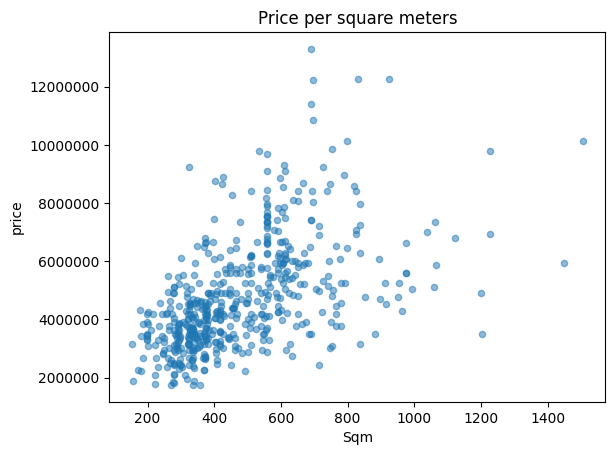

In [ ]:
df.plot(x='sqmeter', y='price', kind='scatter', alpha=0.5)
plt.title('Price per square meters')
plt.xlabel('Sqm')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [ ]:
q25, q75 = np.percentile(df['price'], [25, 75])
iqr_price = stats.iqr(df['price'])
print('IQR:', iqr_price)
inf_price = q25 - (1.5*iqr_price)
up_price = q75 + (1.5*iqr_price)
print(f'Lower Fence: {inf_price}, Upper Fence: {up_price}')
df = df[(df['price'] > 0) & (df['price'] < up_price)]

IQR: 2310000.0
Lower Fence: -35000.0, Upper Fence: 9205000.0


In [ ]:
q25, q75 = np.percentile(df['sqmeter'], [25, 75])
iqr_meter = stats.iqr(df['sqmeter'])
print('IQR:', iqr_meter)
inf_meter = q25 - (1.5*iqr_meter)
up_meter = q75 + (1.5*iqr_meter)
print(f'Lower Fence: {inf_meter}, Upper Fence: {up_meter}')
df = df[(df['sqmeter'] > inf_meter)   & (df['sqmeter'] < up_meter)]

IQR: 257.1825
Lower Fence: -56.20625000000001, Upper Fence: 972.5237500000001


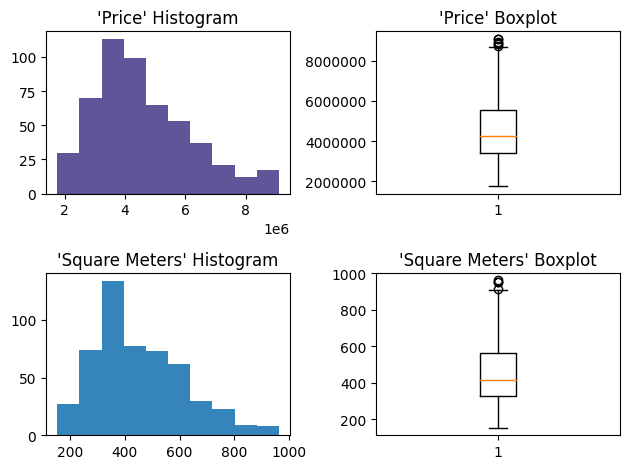

In [ ]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(df['price'], color = '#1C0D6E', alpha=0.7)
axs[0, 0].set_title("'Price' Histogram")
axs[0, 1].ticklabel_format(style='plain', axis='y')
axs[0, 1].boxplot(df['price'])
axs[0, 1].set_title("'Price' Boxplot")

axs[1, 0].hist(df['sqmeter'], alpha=0.9)
axs[1, 0].set_title("'Square Meters' Histogram")
axs[1, 1].boxplot(df['sqmeter'])
axs[1, 1].set_title("'Square Meters' Boxplot")

fig.tight_layout()
plt.show()

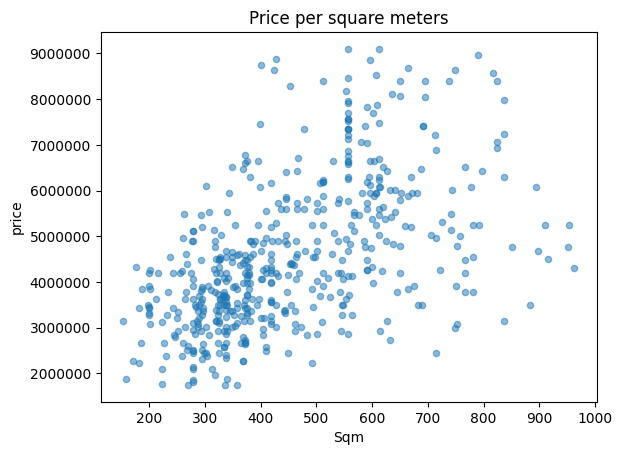

In [ ]:
df.plot(x='sqmeter', y='price', kind='scatter', alpha=0.5)
plt.title('Price per square meters')
plt.xlabel('Sqm')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [ ]:
training = df.sample(frac=0.7, random_state=25)
test = df.drop(training.index)
x_train = np.array(training['sqmeter']).reshape(-1, 1)
y_train = np.array(training['price']).reshape(-1, 1)
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
test['price_predicted'] = reg.predict(np.array(test['sqmeter']).reshape(-1,1))

test.head()

,price,sqmeter,price_predicted
17,8960000,789.67,6.429707e+06
20,8750000,401.34,4.228770e+06
29,8400000,510.96,4.850063e+06
30,8400000,694.44,5.889972e+06
32,8295000,453.36,4.523603e+06


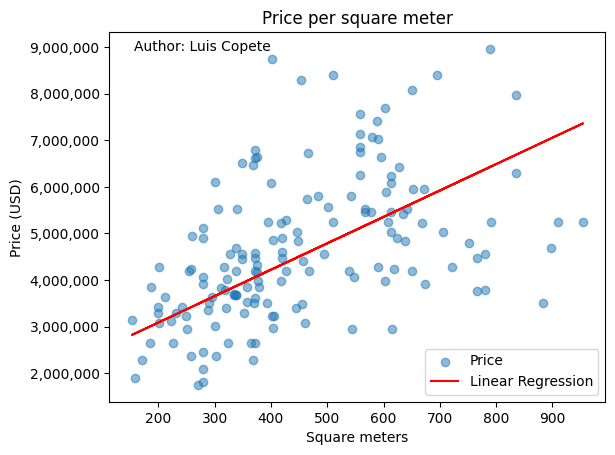

In [ ]:
fig, ax = plt.subplots()


ax.scatter(test['sqmeter'], test['price'], alpha=0.5, label='Price')
ax.plot(test['sqmeter'], test['price_predicted'], color='red', label='Linear Regression')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.title('Price per square meter')
plt.xlabel('Square meters')
plt.ylabel('Price (USD)')


plt.legend()
plt.text(0.05, 0.95, 'Author: Luis Copete', transform=ax.transAxes, fontsize=10)


plt.show()

In [ ]:
from sklearn.metrics import r2_score

# Assuming y_val is original data and f_val is predicted value
y_val = test['price']
f_val = test['price_predicted']

r2 = r2_score(y_val, f_val)
print('The R2 Score for the model is: {:.2f}'.format(r2))

if r2 < 0.3:
    print("The model has a poor fit and cannot explain the variability of the data well.")
elif r2 < 0.5:
    print("The model has a moderate fit and can partially explain the variability of the data.")
elif r2 < 0.7:
    print("The model has a reasonable fit and can explain a good portion of the data variability.")
elif r2 < 0.9:
    print("The model has a good fit and can explain most of the data variability.")
else:
    print("The model has an excellent fit and can explain almost all of the data variability.")

The R2 Score for the model is: 0.20
The model has a poor fit and cannot explain the variability of the data well.


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_val, f_val)
print('The mean squared error is: ', mse)

if mse == 0:
    print("Perfect prediction - The predicted values perfectly match the actual values.")
elif 0 < mse < 0.5:
    print("Excellent prediction - The model has very low error and can accurately predict the target variable.")
elif 0.5 <= mse < 1:
    print("Good prediction - The model has a moderate level of error but still provides reasonably accurate predictions.")
elif 1 <= mse < 5:
    print("Fair prediction - The model has a relatively higher level of error, indicating some deviation from the actual values.")
else:
    print("Poor prediction - The model has a high level of error, suggesting significant discrepancies between the predicted and actual values.")

The mean squared error is:  1870906902861.5815
Poor prediction - The model has a high level of error, suggesting significant discrepancies between the predicted and actual values.


In [ ]:
df=pd.read_csv("Housing.csv")

# **DF**

In [ ]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']

def binary_map(x):
    return x.map({'yes': 1, "no": 0})

df[varlist] = df[varlist].apply(binary_map)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,furnished


In [ ]:
status = pd.get_dummies(df['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [ ]:
status = pd.get_dummies(df['furnishingstatus'], drop_first = True)

In [ ]:
df = pd.concat([df, status], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,furnished,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,furnished,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,semi-furnished,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,furnished,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,furnished,1,0,0


In [ ]:
df.drop(['furnishingstatus'], axis = 1, inplace = True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnished,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,0,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,1,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,1,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [ ]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnished,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.259843,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.439125,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


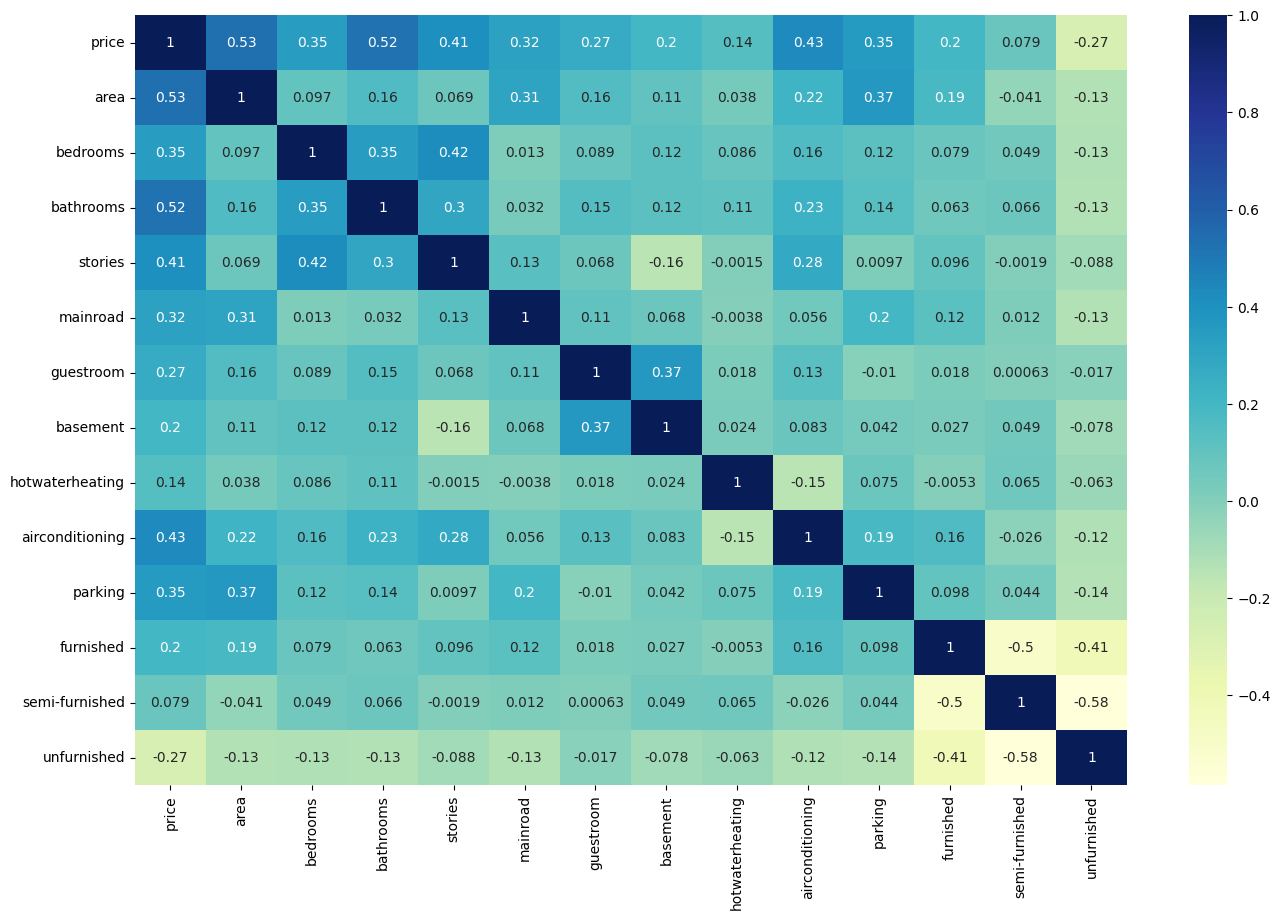

In [ ]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
y_train = df_train.pop('price')
X_train = df_train

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
rfe = RFE(lm,  n_features_to_select=6)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 2),
 ('guestroom', False, 4),
 ('basement', False, 6),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', False, 3),
 ('furnished', False, 8),
 ('semi-furnished', False, 7),
 ('unfurnished', False, 5)]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'hotwaterheating',
       'airconditioning'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]


Index(['mainroad', 'guestroom', 'basement', 'parking', 'furnished',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [ ]:
X_train_rfe = X_train[col]
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     93.37
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           2.89e-71
Time:                        14:32:00   Log-Likelihood:                 338.24
No. Observations:                 381   AIC:                            -662.5
Df Residuals:                     374   BIC:                            -634.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0438      0.016     

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.03
2,bedrooms,1.31
4,stories,1.31
3,bathrooms,1.23
6,airconditioning,1.20
1,area,1.07
5,hotwaterheating,1.06


In [ ]:
y_train_price = lm.predict(X_train_rfe)
res = (y_train_price - y_train)

<ipython-input-72-485a5da4a6bf>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_price), bins = 20)


Text(0.5, 0, 'Errors')

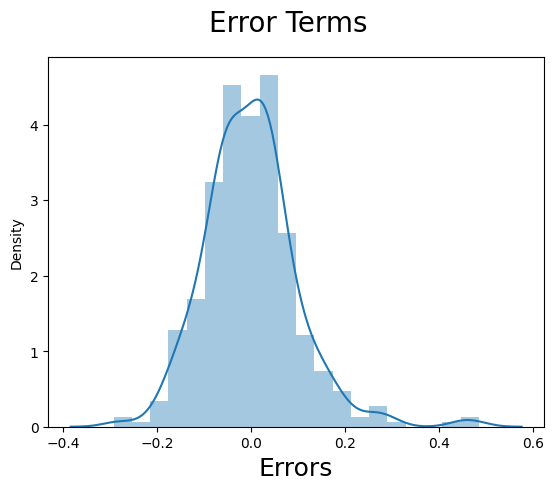

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

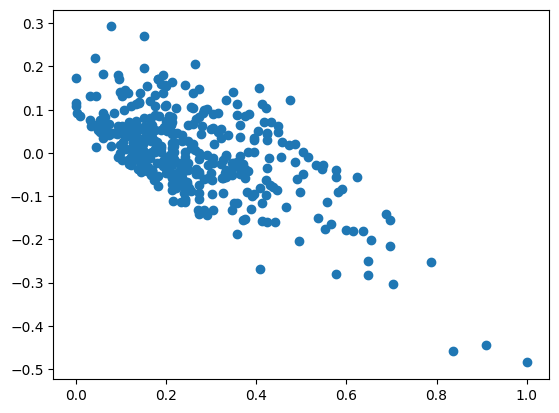

In [ ]:
plt.scatter(y_train,res)
plt.show()

In [ ]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'parking','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


# **FDF**
## New Section

In [ ]:
y_test = df_test.pop('price')
X_test = df_test

KeyError: ignored

In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
X_test_rfe = X_test[X_train_rfe.columns]


In [ ]:
y_pred = lm.predict(X_test_rfe)


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.2186088329706215

Text(0, 0.5, 'y_pred')

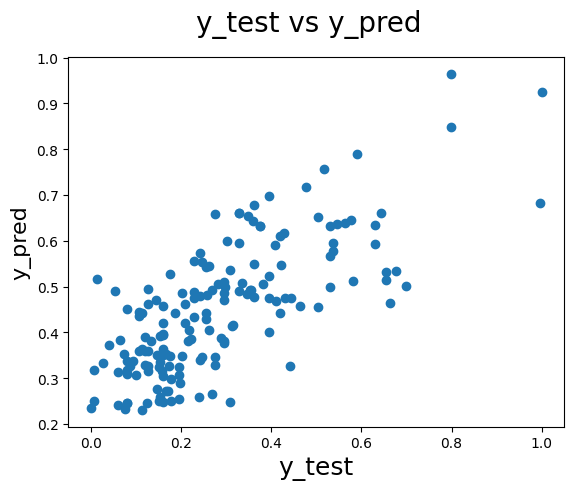

In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

# **DESCRIPTIVE** **STATISTICS**

In [ ]:
tit = df.copy()
df.head()

,price,sqmeter
15,9100000,557.41
16,9100000,613.15
17,8960000,789.67
18,8890000,427.35
19,8855000,596.43


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 15 to 544
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    517 non-null    int64  
 1   sqmeter  517 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 28.3 KB


In [ ]:
df.describe()

,price,sqmeter
count,5.170000e+02,517.000000
mean,4.568873e+06,454.302147
std,1.594826e+06,165.288718
min,1.750000e+06,153.290000
25%,3.395000e+06,327.020000
50%,4.235000e+06,418.060000
75%,5.530000e+06,562.060000
max,9.100000e+06,962.470000


In [ ]:
df.isnull().sum()

price      0
sqmeter    0
dtype: int64

# **UNIVARIATE ANALYSIS**

In [ ]:
import plotly.express as px

print (f'{round(tit["price"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(tit, x="price", title='price', width=400, height=400)
fig.show()

4200000    3.29
3500000    3.09
4900000    2.13
3150000    1.74
5250000    1.74
           ... 
4382000    0.19
6615000    0.19
4445000    0.19
6580000    0.19
6930000    0.19
Name: price, Length: 205, dtype: float64


In [ ]:
print (f'{round(tit["area"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(tit, x="area", title='area', width=400, height=400)
fig.show()

KeyError: ignored

In [ ]:
print (f'{round(tit["basement"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(tit, x="basement", title='basement', width=400, height=400)
fig.show()

KeyError: ignored

In [ ]:
print (f'{round(tit["parking"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(tit, x="parking", title='parking', width=400, height=400)
fig.show()

KeyError: ignored

In [ ]:
print (f'{round(tit["furnishingstatus"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(tit, x="furnishingstatus", title='furnishingstatus', width=400, height=400)
fig.show()

# **BI-VARIATE ANALYSIS**

In [ ]:
import seaborn as sns

sns.swarmplot(x='area',y='basement',hue='price',dodge='True',data=df_tit)

In [ ]:
sns.stripplot(x='bedrooms',y='guestroom',hue='price',dodge='True',data=df_tit)

In [ ]:
sns.stripplot(x='bathrooms',y='hotwaterheating',hue='price',dodge='True',data=df_tit)

In [ ]:
sns.stripplot(x='stories',y='furnishingstatus',hue='price',dodge='True',data=df_tit)

# **MULTI-VARIATE ANALYSIS**

In [ ]:
f,ax=plt.subplots(1,3,figsize=(13,6))
sns.distplot(df_tit[df_tit['parking']==1].area,ax=ax[0])
ax[0].set_title('Area in parking 1')
sns.distplot(df_tit[df_tit['parking']==2].area,ax=ax[1])
ax[1].set_title('Area in parking 2')
sns.distplot(df_tit[df_tit['parking']==3].area,ax=ax[2])
ax[2].set_title('Area in parking 3')
plt.show()

In [ ]:
n_bins = 50
histplot_hyperparams = {
    'kde':True,
    'alpha':0.4,
    'stat':'percent',
    'bins':n_bins,

}
cols=[ 'area', 'price', 'basement', 'parking',
       'mainroad', 'guestroom']
fig, ax = plt.subplots(2,3, figsize=(16, 10))
ax = ax.flatten()

for i, column in enumerate(cols):
    sns.histplot(
        df_tit[column], label='Titanic',
        ax=ax[i], color='red', **histplot_hyperparams
    )

# **HANDLING MISSING VALUES**

In [ ]:
def draw_missing_data_table(df_tit):
    total = df_tit.isnull().sum().sort_values(ascending=False)
    percent = (df_tit.isnull().sum()/df_tit.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [ ]:
draw_missing_data_table(df_tit)

In [ ]:
df_tit.dtypes

In [ ]:
df_tit['mainroad'] = pd.Categorical(df_tit['mainroad'])
df_tit['guestroom'] = pd.Categorical(df_tit['guestroom'])
df_tit['basement'] = pd.Categorical(df_tit['basement'])
df_tit['hotwaterheating'] = pd.Categorical(df_tit['hotwaterheating'])
df_tit['airconditioning'] = pd.Categorical(df_tit['airconditioning'])
df_tit['furnishingstatus'] = pd.Categorical(df_tit['furnishingstatus'])

In [ ]:
df_tit['rooms'] = df_tit['bedrooms'] + df_tit['bathrooms']
df_tit.head()

In [ ]:
df_tit.drop('bedrooms',axis=1,inplace=True)
df_tit.drop('bathrooms',axis=1,inplace=True)
df_tit.head()

In [ ]:
sns.boxplot(x=df_tit['fare'],data=df_tit)

In [ ]:
df_tit['fare'].hist()

In [ ]:
print('skewness value of Age: ',df_tit['age'].skew())
print('skewness value of Fare: ',df_tit['fare'].skew())

In [ ]:
Q1=df_tit['fare'].quantile(0.25)
Q3=df_tit['fare'].quantile(0.75)
IQR=Q3-Q1
IQR

In [ ]:
whisker_width = 1.5
Fare_outliers = df_tit[(df_tit['fare'] < Q1 - whisker_width*IQR) | (df_tit['fare'] > Q3 + whisker_width*IQR)]
Fare_outliers.head()

In [ ]:
fare_mean = df_tit['fare'].mean()
fare_std = df_tit['fare'].std()
low= fare_mean -(3 * fare_std)
high= fare_mean + (3 * fare_std)
fare_outliers = df_tit[(df_tit['fare'] < low) | (df_tit['fare'] > high)]
fare_outliers.head()

In [ ]:
Q1 = df_tit['fare'].quantile(0.10)
Q3 = df_tit['fare'].quantile(0.90)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
index=df_tit['fare'][(df_tit['fare']>upper_whisker)|(df_tit['fare']<lower_whisker)].index
df_tit.drop(index,inplace=True)
sns.boxplot(x=df_tit['fare'],data=df_tit)